In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Anamitra Singha\Desktop\Widhya Wintership\Bitcoin price prediction\bitcoin_dataset.csv')

In [4]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [8]:
df.btc_market_price[1023]

13.6888

## Exploratory Data Analysis

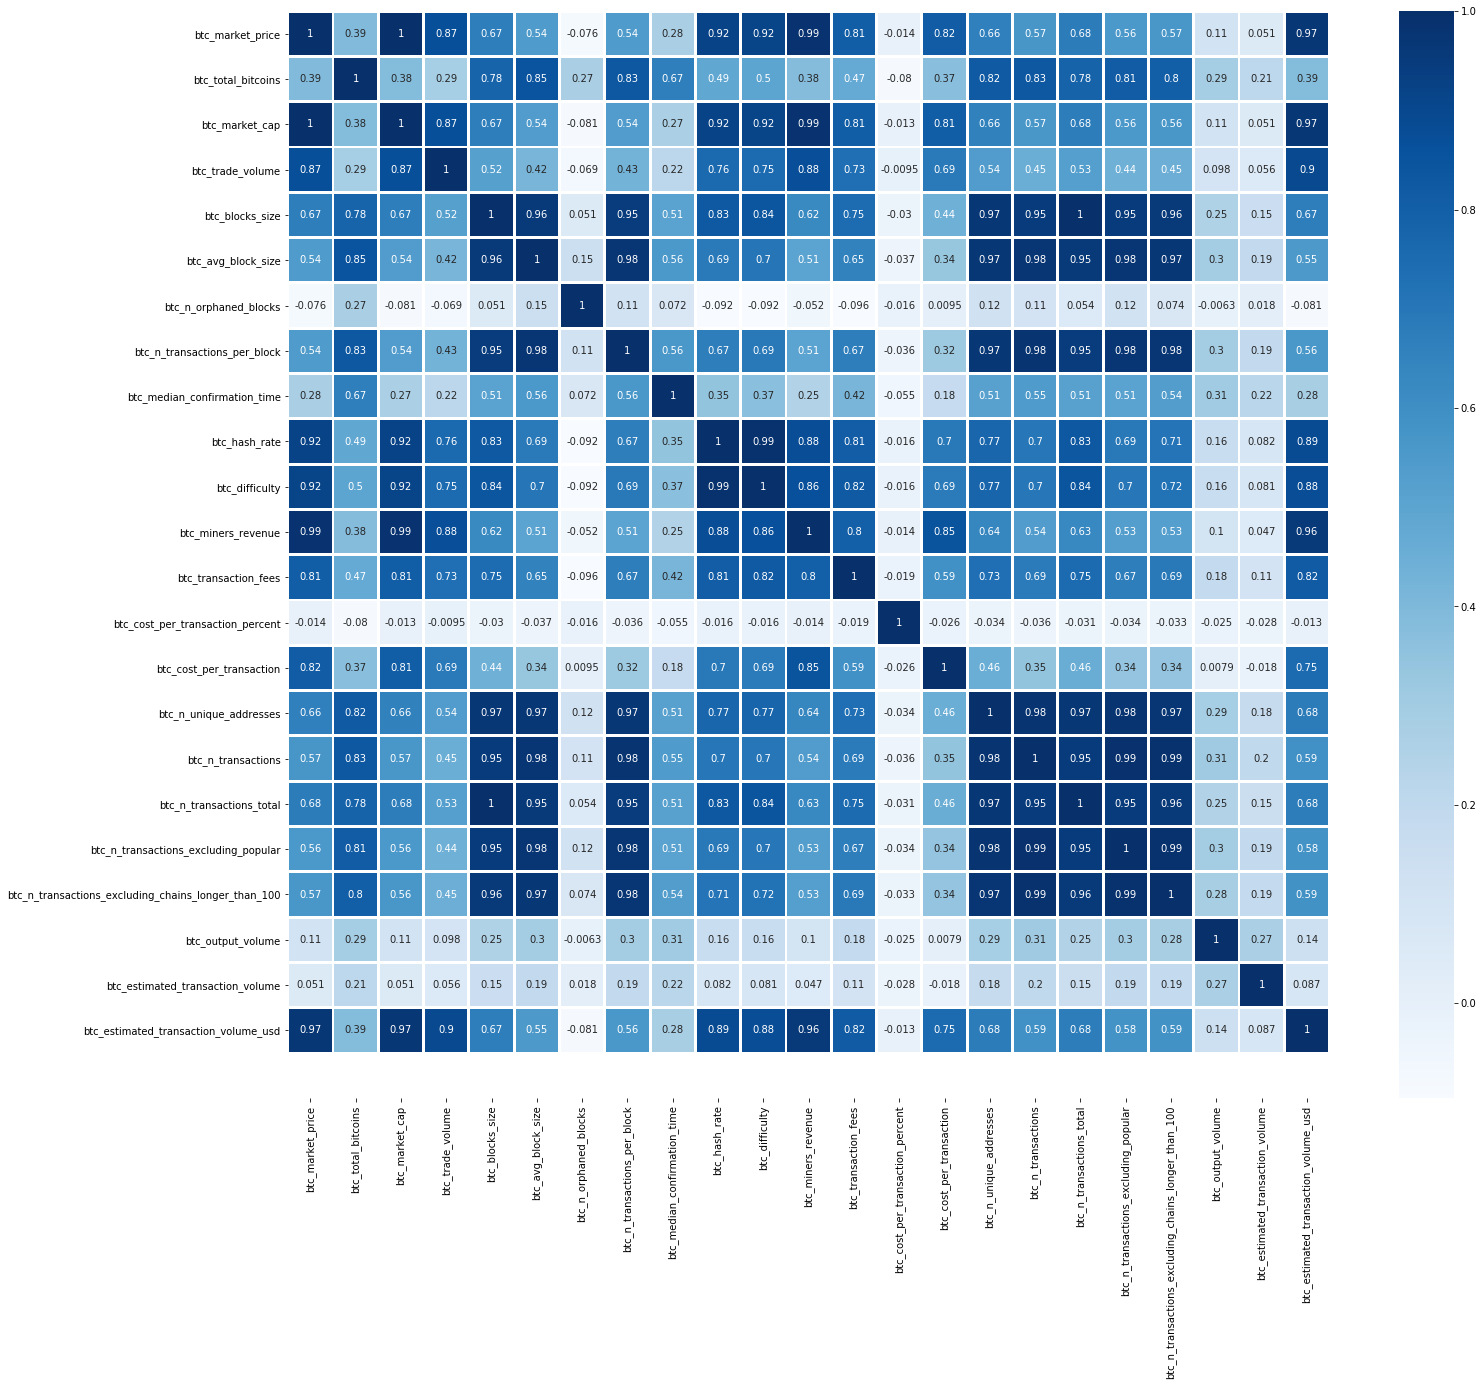

In [47]:
plt.figure(figsize = (25, 20))
sns.heatmap(data = df.corr(), annot = True, linewidths = 2, square = 1, cmap = 'Blues')
plt.ylim(24, 0)
plt.show()

## Data Cleaning

In [48]:
print("No of NULL values : ", sum(df.isnull().any()))

No of NULL values :  6


In [61]:
for i, col in enumerate(df.columns):
    if df.isnull().any()[i]:
        df[col].fillna((df[col].median()), inplace = True)
        
    

In [64]:
print("No of NULL values after median imputation: ", sum(df.isnull().any()))

No of NULL values after median imputation:  0


## Modelling using Linear Regression

In [133]:
df.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [134]:
X = df[['btc_market_cap', 'btc_n_transactions', 'btc_miners_revenue', 'btc_cost_per_transaction', 'btc_difficulty', 'btc_hash_rate', 'btc_cost_per_transaction_percent']]
y = df['btc_market_price']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [136]:
print('Shape of X_train : {}'.format(X_train.shape))
print('Shape of y_train : {}'.format(y_train.shape))
print('='*40)
print('Shape of X_test : {}'.format(X_test.shape))
print('Shape of y_test : {}'.format(y_test.shape))

Shape of X_train : (2034, 7)
Shape of y_train : (2034,)
Shape of X_test : (872, 7)
Shape of y_test : (872,)


In [142]:
#fitting over training data
linreg = LinearRegression().fit(X_train, y_train)

#predicting over the test data using the regressor fitted on training data
y_pred_test = linreg.predict(X_test)

#MSE
mse = np.sqrt((((y_test.values - y_pred_test)**2).sum())*(1/872))


In [143]:
mse

603.4679055238882